# Analisis de Datos del Grupo C
## **Universidad de Palermo y Universidad Nacional de Jujuy**

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importantes del dataset

# Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno, para así mantener una consistencia.

In [596]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

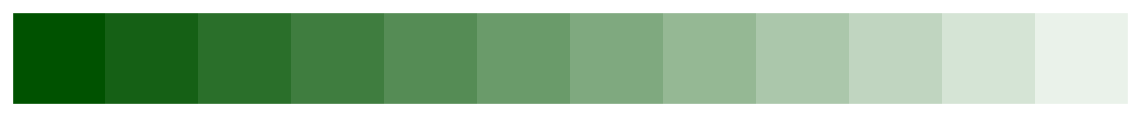

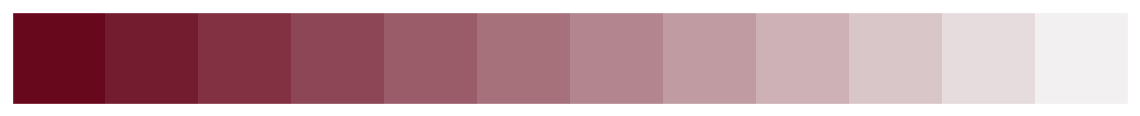

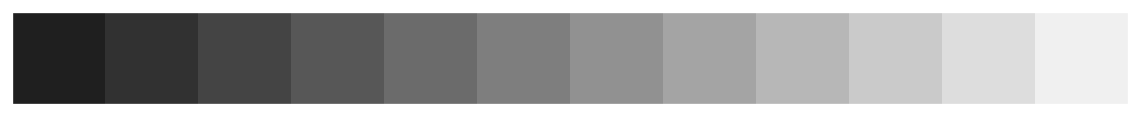

In [597]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False

sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]

sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

# Importaciones de los datos

En esta sección **importamos los datasets transformados** y además datos externos de la base de datos geonames para extraer las provincias de los alumnos, con el fin de realizar un análisis más profundo respecto a la **variable geográfica**.

In [598]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoC_jujuy_universidad'
university1_name = 'universidad nacional de jujuy'

university2 = 'GrupoC_palermo_universidad'
university2_name = 'universidad de palermo'

df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep=',')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep=',')
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None)


# Primer acercamiento, correcciones y transformaciones adicionales

En esta sección vemos los aspectos fundamentales de los datos a trabajar, hacemos algunas correcciones y expandimos los datos

In [599]:
#imprimimos las columnas
df_1.columns 

Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [600]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1866 non-null   object
 1   career            1866 non-null   object
 2   inscription_date  1866 non-null   object
 3   first_name        1866 non-null   object
 4   last_name         1866 non-null   object
 5   gender            1866 non-null   object
 6   age               1866 non-null   int64 
 7   postal_code       1866 non-null   int64 
 8   location          1866 non-null   object
 9   email             1866 non-null   object
dtypes: int64(2), object(8)
memory usage: 145.9+ KB


In [601]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        4525 non-null   object
 1   career            4525 non-null   object
 2   inscription_date  4525 non-null   object
 3   first_name        4483 non-null   object
 4   last_name         4525 non-null   object
 5   gender            4525 non-null   object
 6   age               4525 non-null   int64 
 7   postal_code       4525 non-null   int64 
 8   location          4525 non-null   object
 9   email             4525 non-null   object
dtypes: int64(2), object(8)
memory usage: 353.6+ KB


In [602]:
print(f'La cantida de carreras en la {university1_name} es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_1.career.unique()))

La cantida de carreras en la universidad nacional de jujuy es de: 33
La cantida de carreras en la universidad de palermo es de: 33


In [603]:
df_1.describe()

,age,postal_code
count,1866.000000,1866.000000
mean,58.697749,4728.638264
std,33.584414,2180.439902
min,1.000000,1602.000000
25%,29.000000,2918.000000
50%,60.000000,4501.000000
75%,88.000000,6410.500000
max,117.000000,9421.000000


In [604]:
df_2.describe()

,age,postal_code
count,4525.000000,4525.000000
mean,24.508950,4802.572155
std,7.528855,2157.245567
min,19.000000,1601.000000
25%,21.000000,3041.000000
50%,21.000000,4651.000000
75%,21.000000,6439.000000
max,50.000000,9421.000000


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica. Por lo tanto gráficamos como se vería la distribución de los valores de edad.

Text(0, 0.5, 'Cantidad')

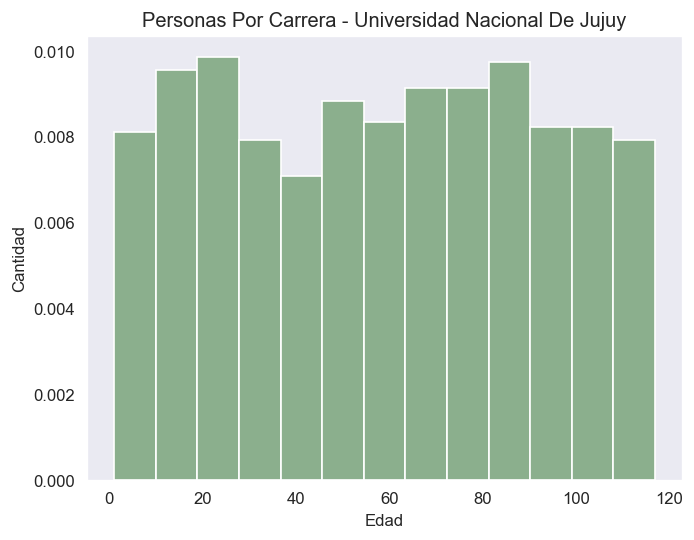

In [605]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

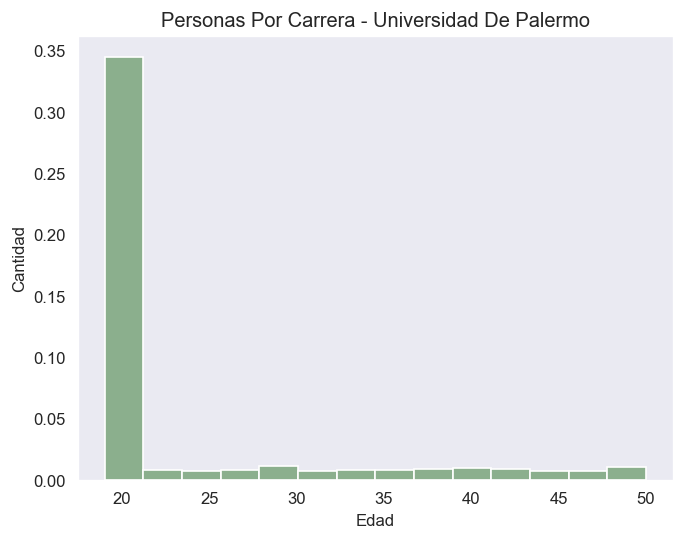

In [606]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Como vemos que las edades tienen valores que no son coherentes, como serían alumnos menores de 15 años y mayores de 85, siendo que la edad de ingreso a la universidad usualmente es de 17-18 años y siendo que la esperanza de vida de argentina es hasta los 72 años aproximadamente (1).

(1) https://datosmacro.expansion.com/demografia/esperanza-vida/argentina#:~:text=En%202020%20la%20esperanza%20de,fue%20de%2073%2C41%20a%C3%B1os.

In [607]:
df_1 = df_1[df_1.age.between(15,85)]
df_2 = df_2[df_2.age.between(15,85)]

Text(0, 0.5, 'Carrera')

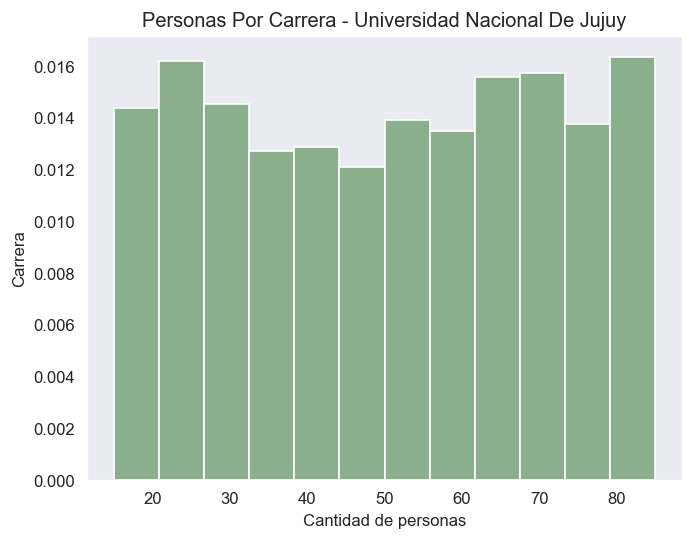

In [608]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

La distribución de las dedades para esta universidad parece tratarse de una distribución uniforme.

Text(0, 0.5, 'Cantidad')

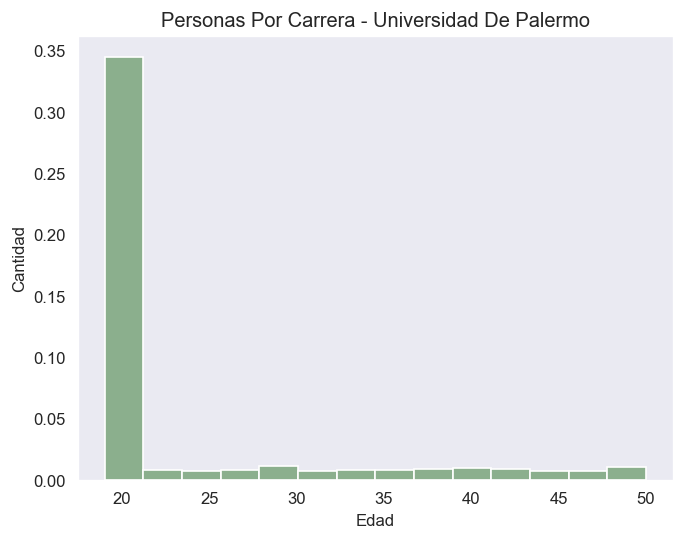

In [609]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

In [611]:
df_geonames.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,NaN,NaN,NaN,NaN,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,NaN,NaN,NaN,NaN,-25.7833,-64.5000,4


Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [612]:
df_geonames.dropna(axis=1, inplace=True)

Realizamos la combinacion de los datasets

In [613]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [614]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [615]:
df_1geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,8521,BALNEARIO LAS GRUTAS,Rio Negro,R,-41.6167,-66.2333,3.0,universidad nacional de jujuy,licenciatura en musicoterapia,2020-11-27,megan,lopez,female,55,arroyo de la ventana,reeddonald@yahoo.com
1,AR,8521,ARROYO TEMBRADO,Rio Negro,R,-41.6167,-66.2333,3.0,universidad nacional de jujuy,licenciatura en musicoterapia,2020-11-27,megan,lopez,female,55,arroyo de la ventana,reeddonald@yahoo.com


In [616]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')
df_2geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,2846,ISLAS LECHIGUANAS,Entre Rios,E,-33.7,-59.1375,3.0,universidad de palermo,actuario,2021-01-11,gregory,wilson,male,21,anahi,harrissheila@gmail.com
1,AR,2846,PUERTO PERAZZO,Entre Rios,E,-33.7,-59.1375,3.0,universidad de palermo,actuario,2021-01-11,gregory,wilson,male,21,anahi,harrissheila@gmail.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

# Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

### Curriculas

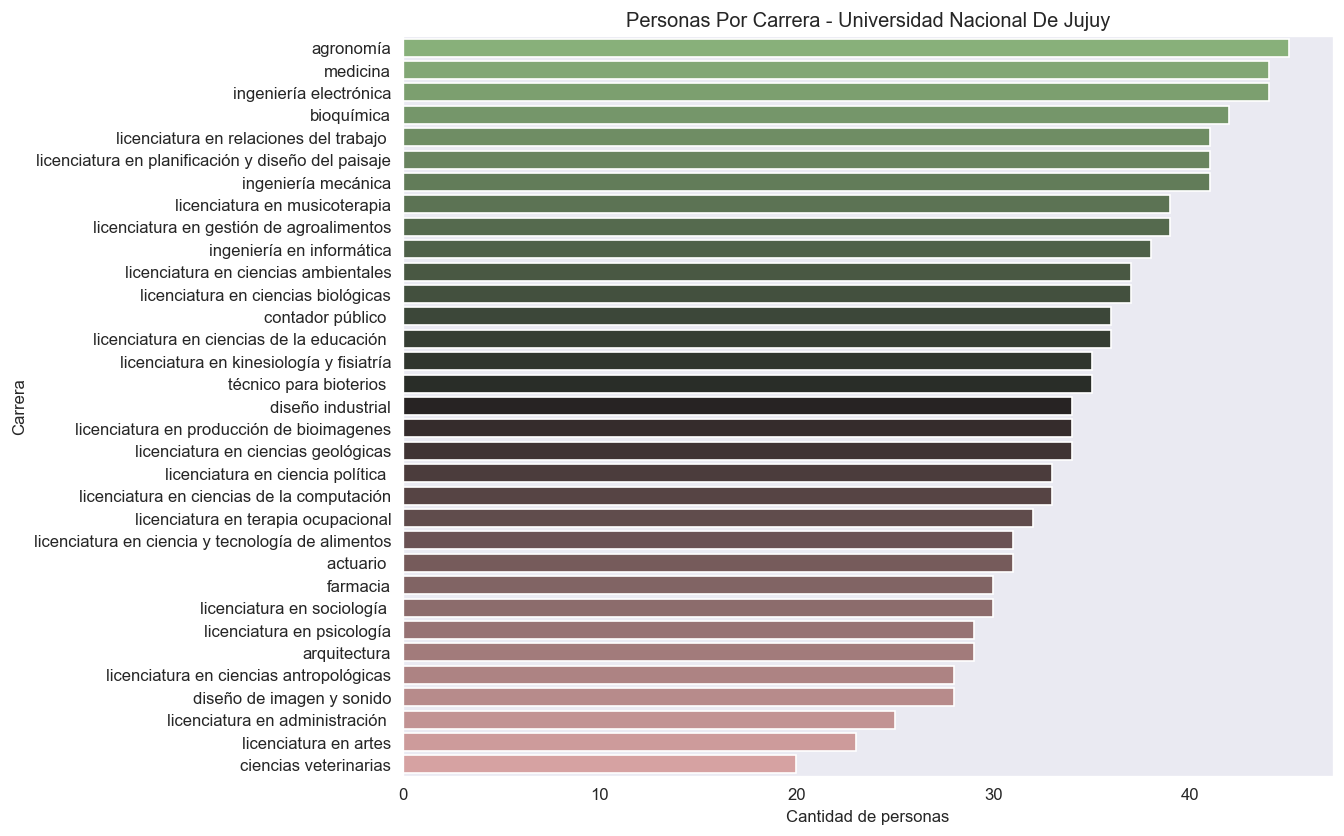

In [617]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

En principio podémos observar que hay una diferencia entre la cantidad de personas que componen el alumnado, al observar el total de alumnos de cada carrera.

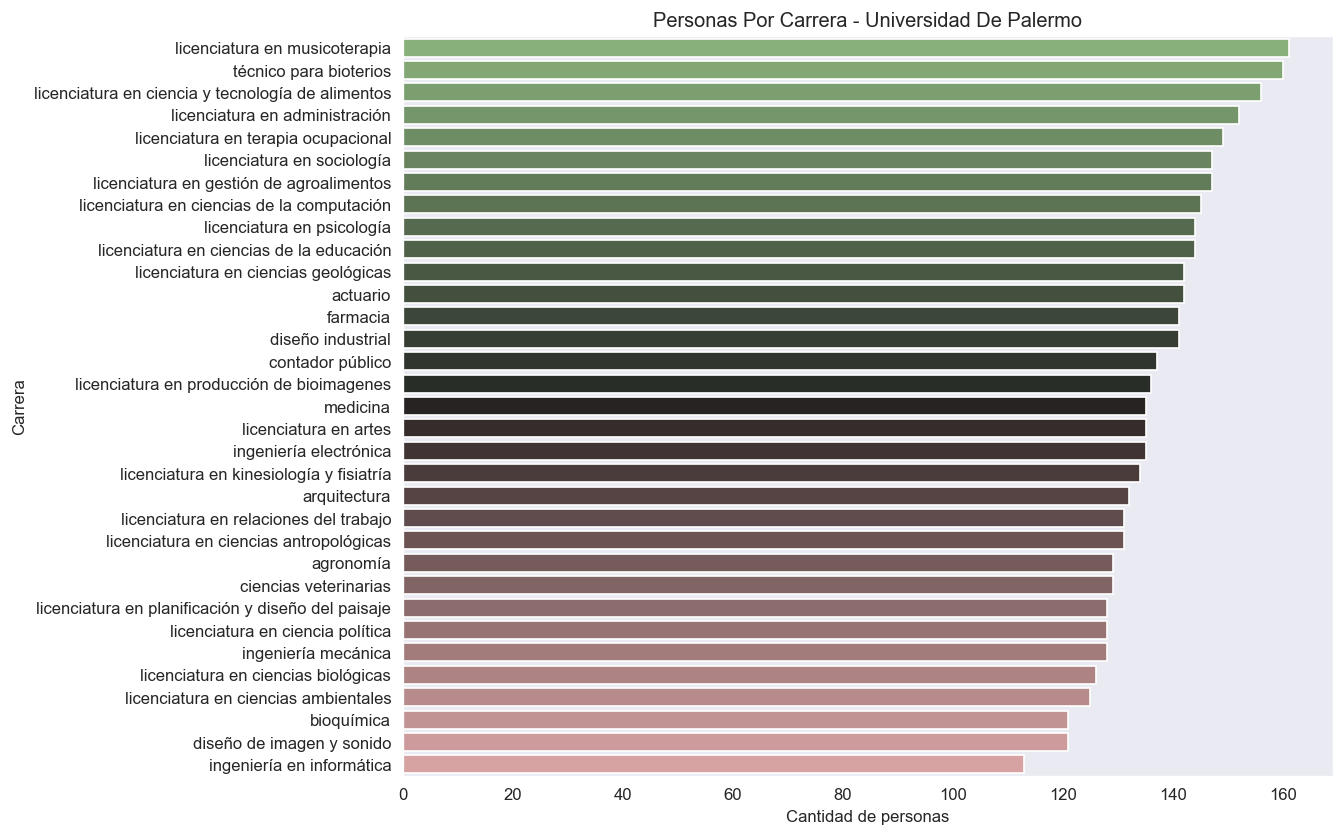

In [618]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

Esto es algo que se repite en esta universidad, pero la cantidad de alumnos por carrera es más grande y la diferencia parece ser más atenuada entre la carrera más concurrida con la menor concurrida.

## Detalle de la variable carrera

Para evaluar más en detalle la composición de alumnos para las diferentes carreras se propone observar las diez carreras con más alumnos de cada universidad y las 10 carreras con menos alumnos de cada universidad, para además comparar con la media de alumnos de toda la oferta académica.



### Universidad Nacional de Jujuy

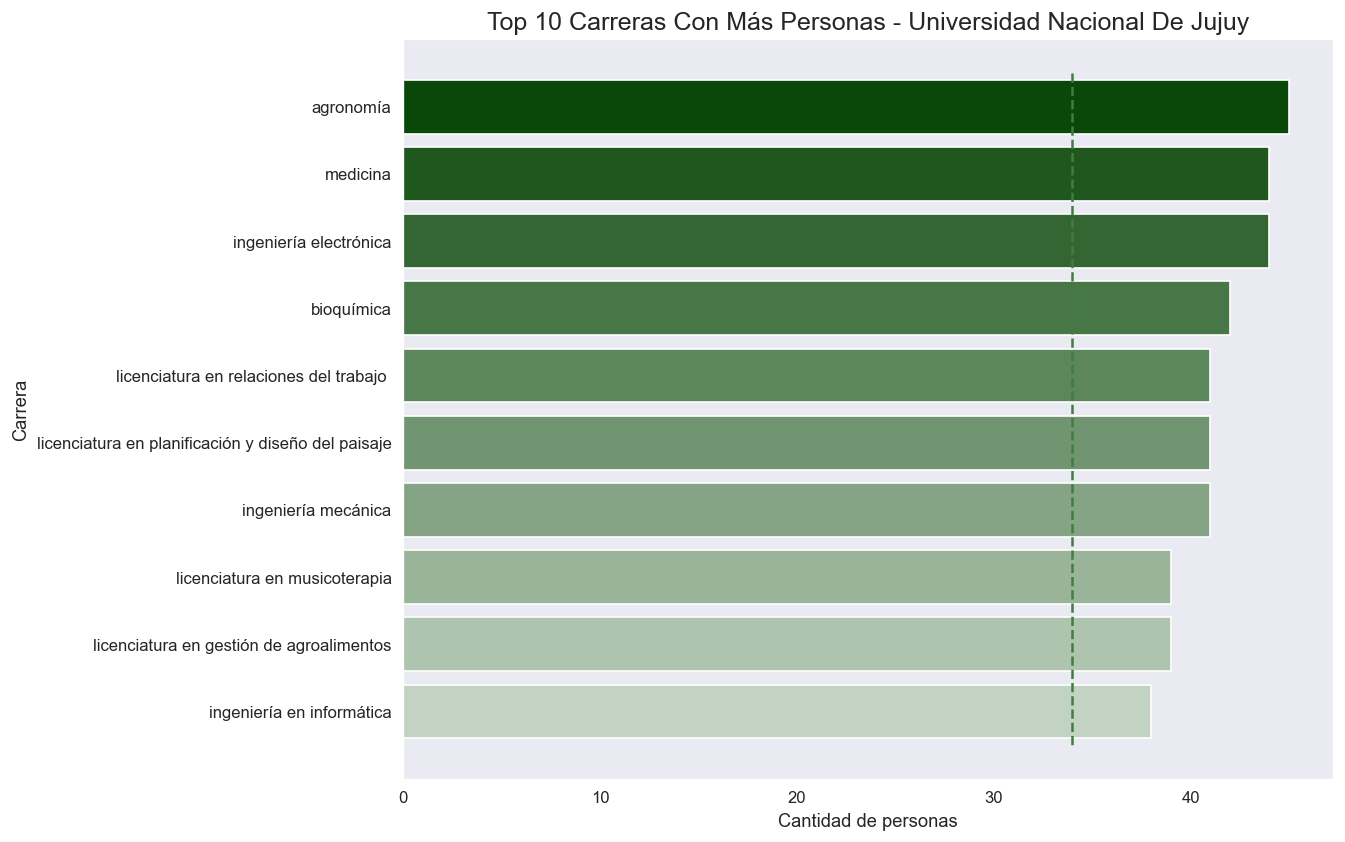

In [619]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

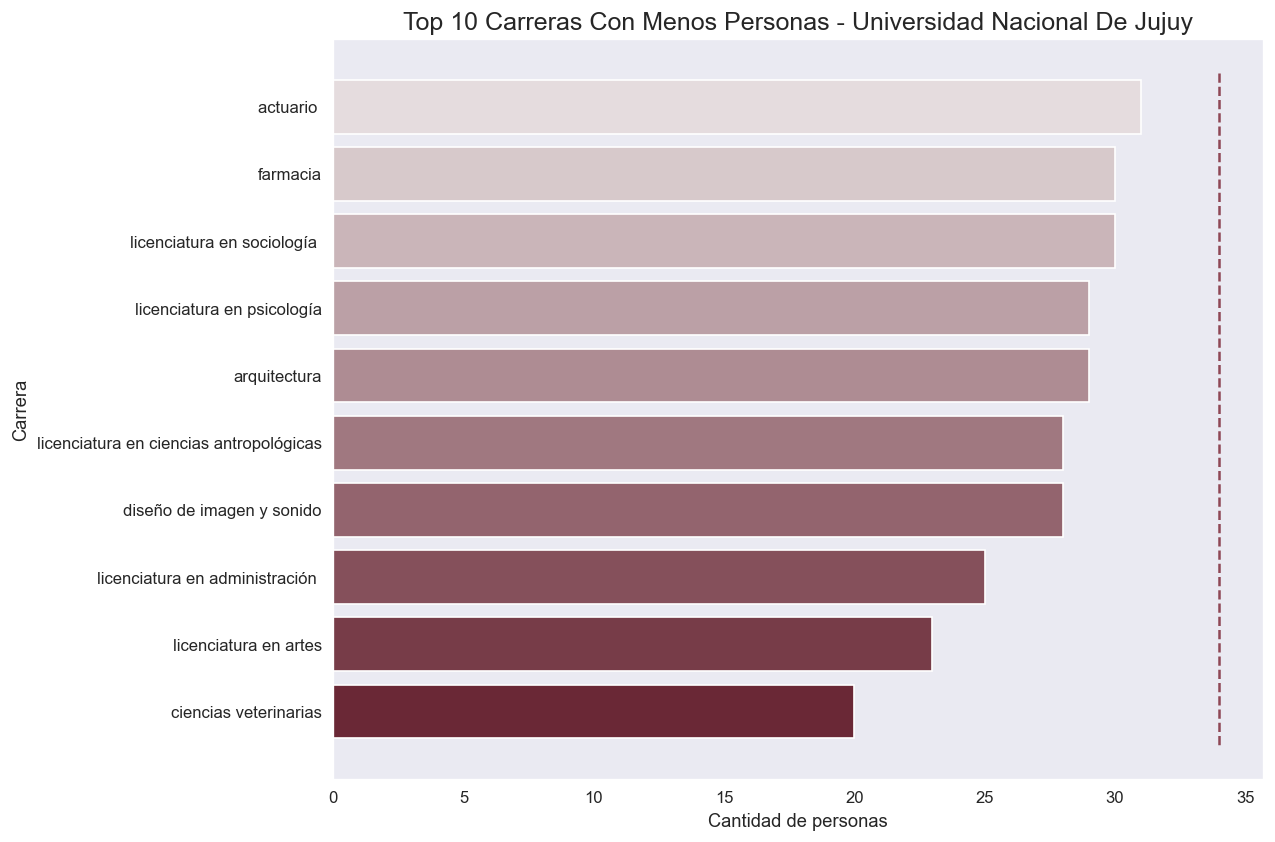

In [620]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Como se puede observar en este gráfico, estás 10 carreras son las que menor cantidad de alumnos presenta y que se encuentran alejados de la media de todas las carreras, vista como una línea punteada en el gráfico.

Text(0, 0.5, 'Cantidad de carreras')

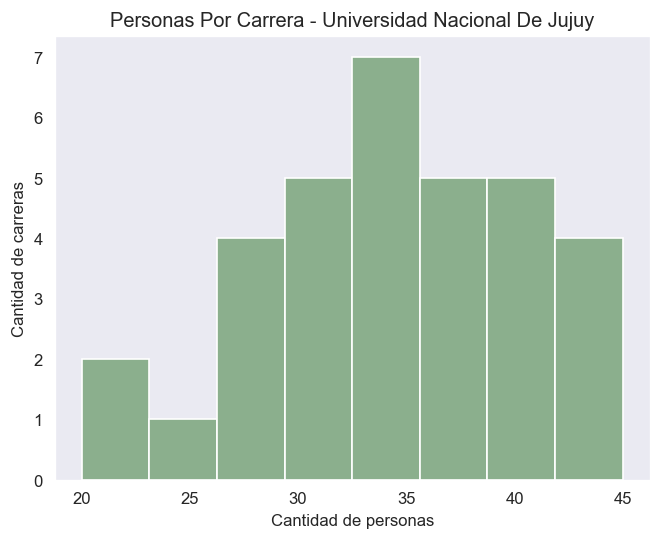

In [621]:
sns.histplot(df_1.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [622]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_1.career.value_counts().describe()

count    33.000000
mean     34.363636
std       6.117690
min      20.000000
25%      30.000000
50%      34.000000
75%      39.000000
max      45.000000
Name: career, dtype: float64

Como podémos observar la distribución de alumnos por carrera tiene una media de 34 alumnos y parece estar sesgada hacía la derecha, en este caso la mayoría de las carreras tienen al menos 30 alumnos.

### Universidad de Palermo

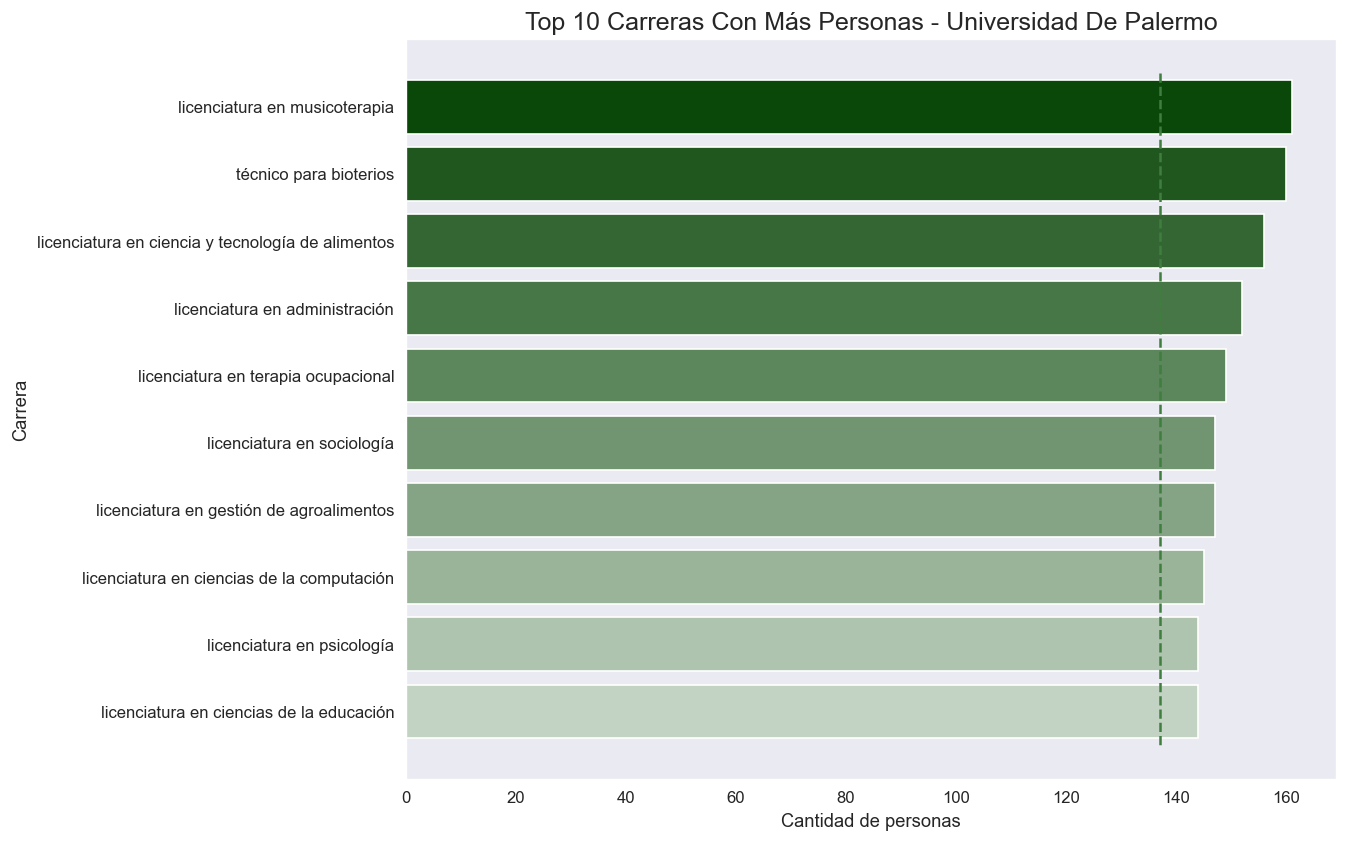

In [623]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

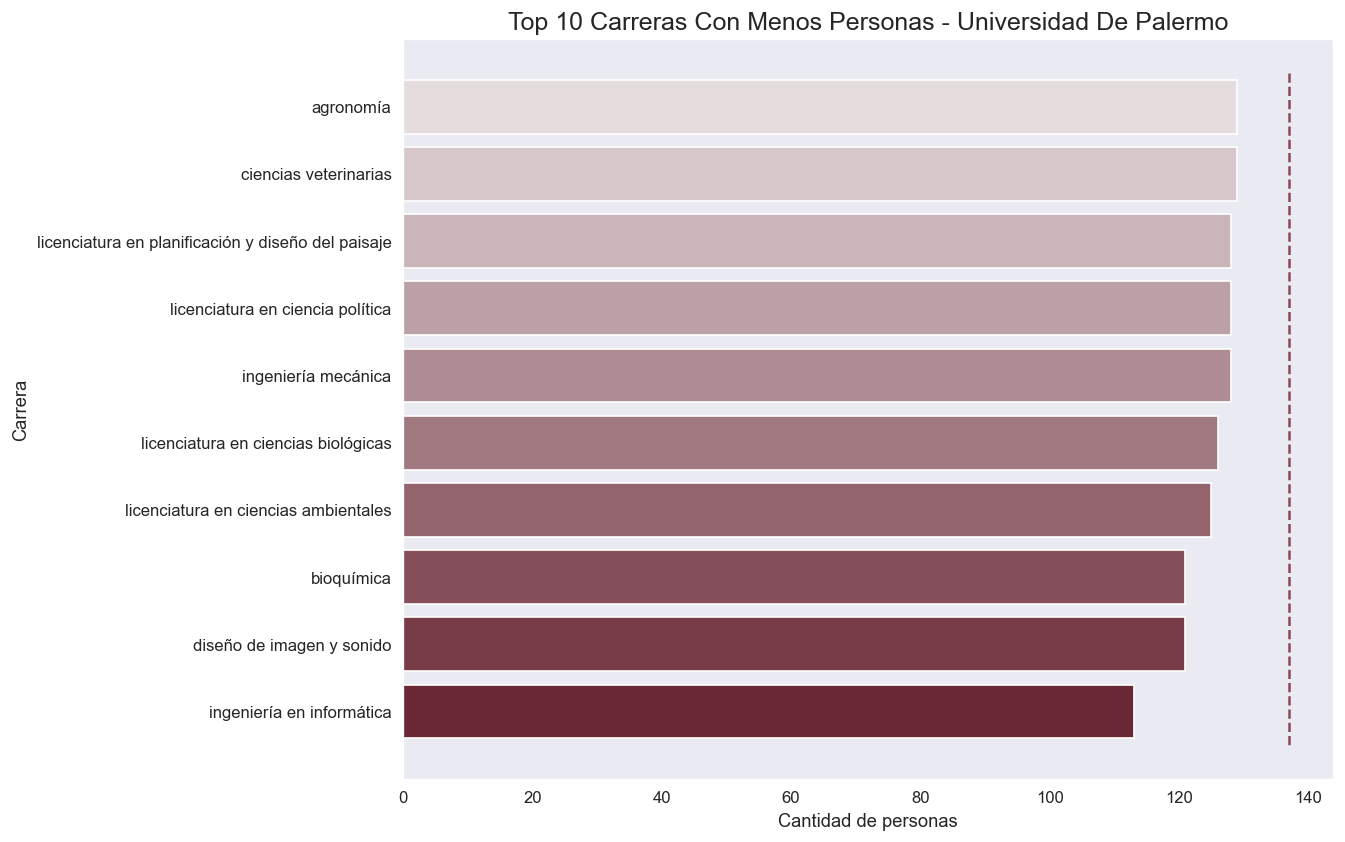

In [624]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Text(0, 0.5, 'Cantidad de carreras')

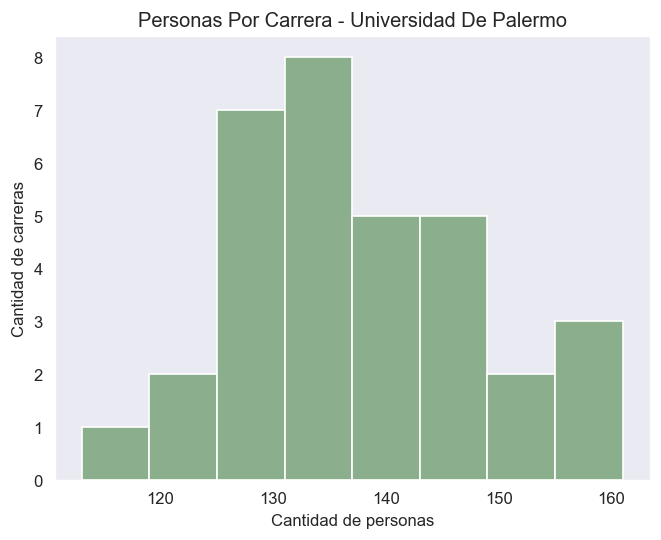

In [625]:
sns.histplot(df_2.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [626]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_2.career.value_counts().describe()

count     33.000000
mean     137.121212
std       11.348892
min      113.000000
25%      129.000000
50%      135.000000
75%      144.000000
max      161.000000
Name: career, dtype: float64

En este caso la media es de 129 alumnos por carrera, presentando un minímo de 106, pero la mayoría de las carreras tienen al menos 120 alumnos en esta universidad. Parece tratarse de una distribución normal de las edades.

### Análisis por género y edad - UNJ

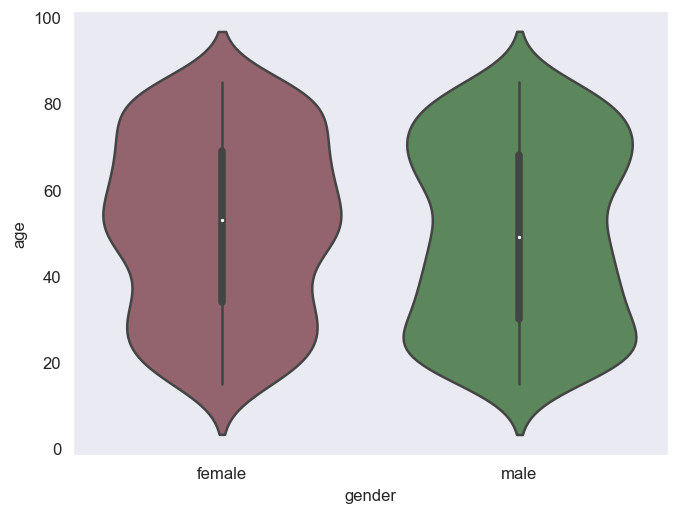

In [627]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

Si observamos la distribución de la edad utilizando los diagrámas de violín categorízado por el género vemos que ambos poseen una distribución uniforme, con una alta dispersión, aunque si podemos observar una una bimodalidad en el gráfico de varones ubicado aproximadamente en los 30 años y los 70 años.

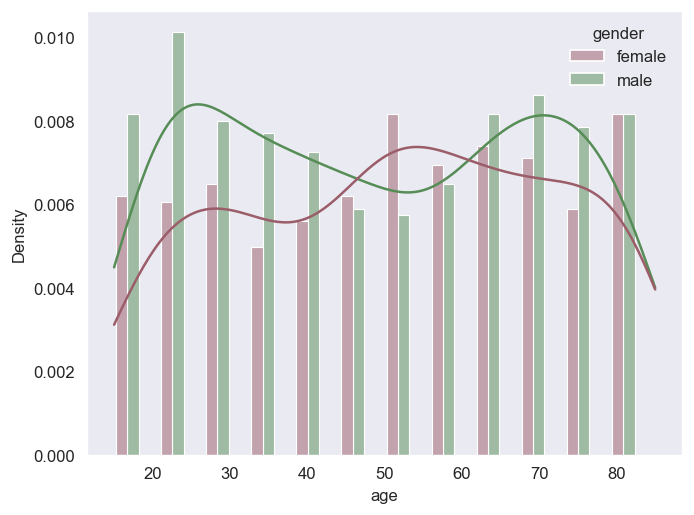

In [628]:
fig, ax = plt.subplots()
sns.histplot(data=df_1,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

Otra forma de visualizar esto es a través de un gráfico de tipo histograma categorizado y sus respectivas curvas de densidad aproximada. En este caso podemos ver las dos modas en la distribución de los varones

### Provincias - UNJ

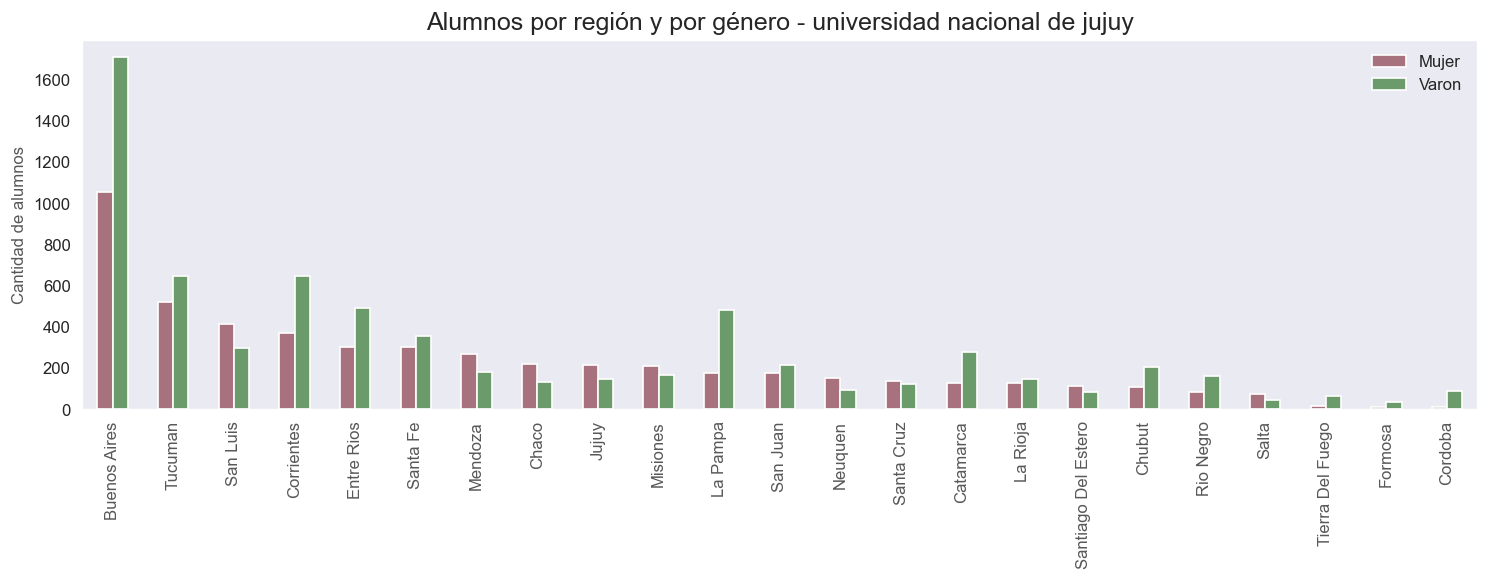

In [629]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

En este gráfico de barras apareadas y ordenadas de forma descendente por género. Respecto a la distribución de alumnos por provincia podemos observar que la gran mayoría de los alumnos provienen de la Provincia de Buenos Aires y es destacable la diferencia entre géneros

Text(0.5, 0, '')

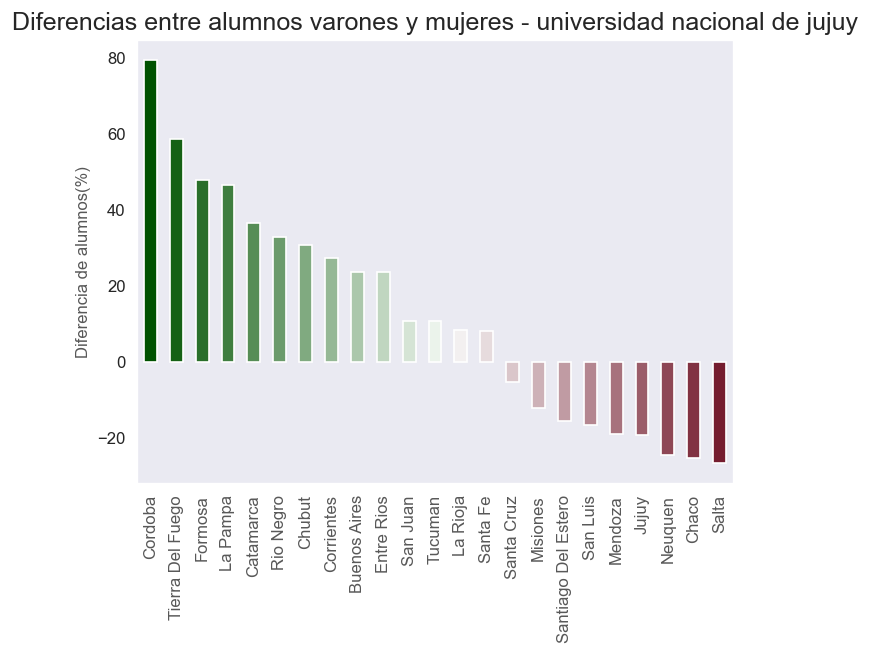

In [630]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres - {university1_name}',{'fontsize':15})
ax.set_ylabel('Diferencia de alumnos(%)',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Con este gráfico podemos resumir como se ve la diferencia de alumnos para cada provincia en particular de forma porcentual. Cordoba es la que presenta mayor disparidad respecto a varones junto con Tierra del Fuego y Formosa. Respecto a disparidad de mujeres Salta, Chaco y Neuquén son las que presentan mayor disparidad de alumnas provenientes de esas provincias.

### Localidades  - UNJ

In [631]:
df_1.location.value_counts().head(10)

anguil                     5
25 de mayo                 5
agrelo                     4
arano                      4
campo moises seccion 1a    4
baños de la laja           4
bella vista                4
arauco                     4
campo cicare               4
la colina                  4
Name: location, dtype: int64

<AxesSubplot:ylabel='Frequency'>

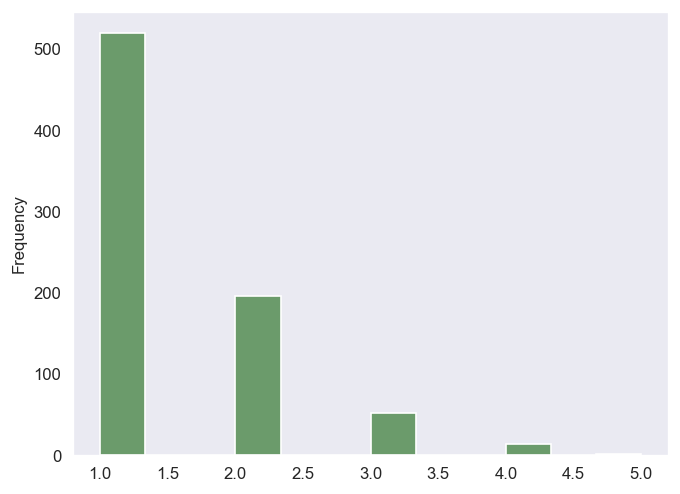

In [632]:
df_1.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

Al parecer **no hay una localidad que destaque** por su aporte de alumnos siendo que la mayoría aporta solo un alumno o dos.

### Análisis por género y edad - UP

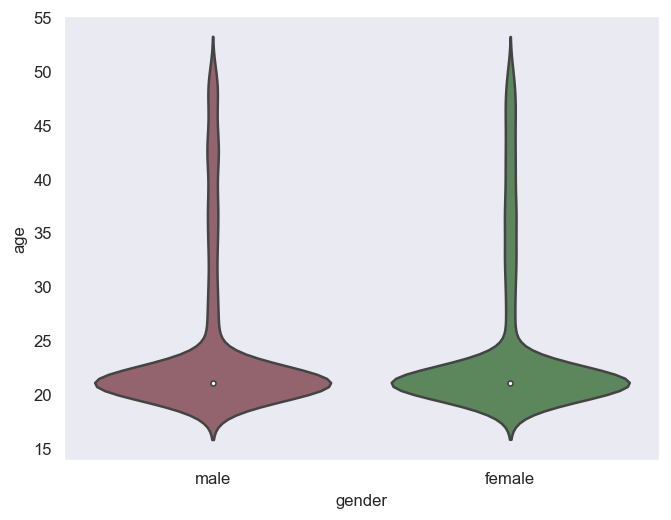

In [633]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

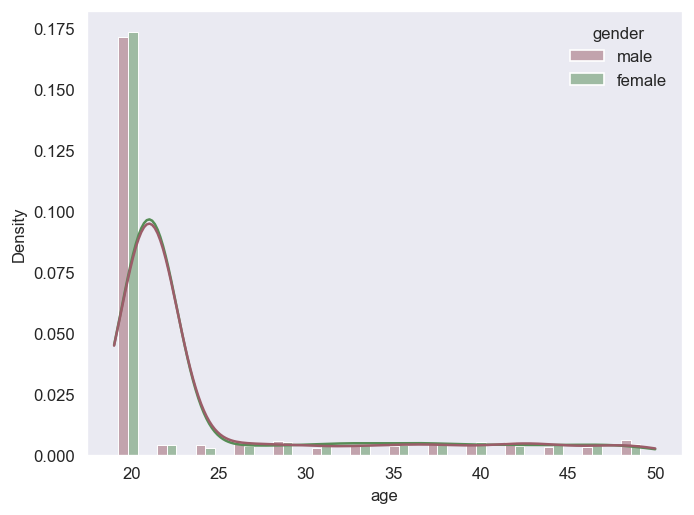

In [634]:
fig, ax = plt.subplots()
sns.histplot(data=df_2,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

La distribución por edades parece tener un gran pico en 20 años y una proporción muy baja y dispersa de las demás edades.

### Provincias - UP

C:\Users\julia\AppData\Local\Temp\ipykernel_4624\3775228803.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


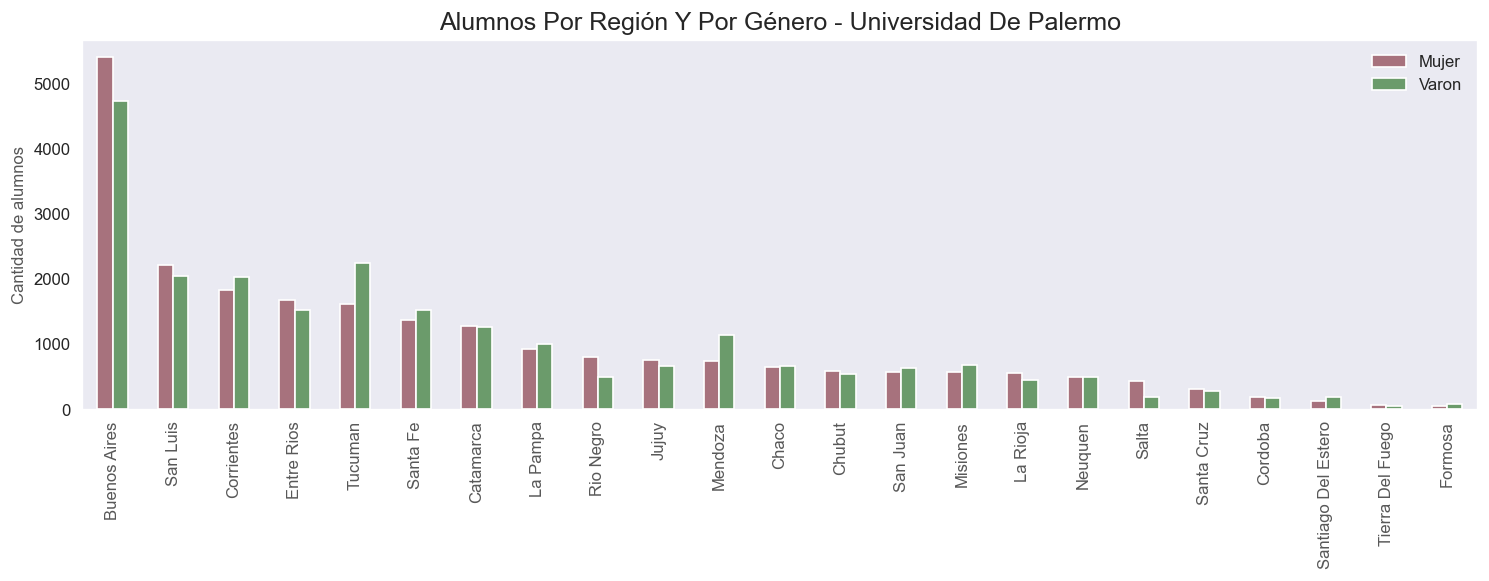

In [635]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'},
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}'.title(),{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()

Text(0.5, 0, '')

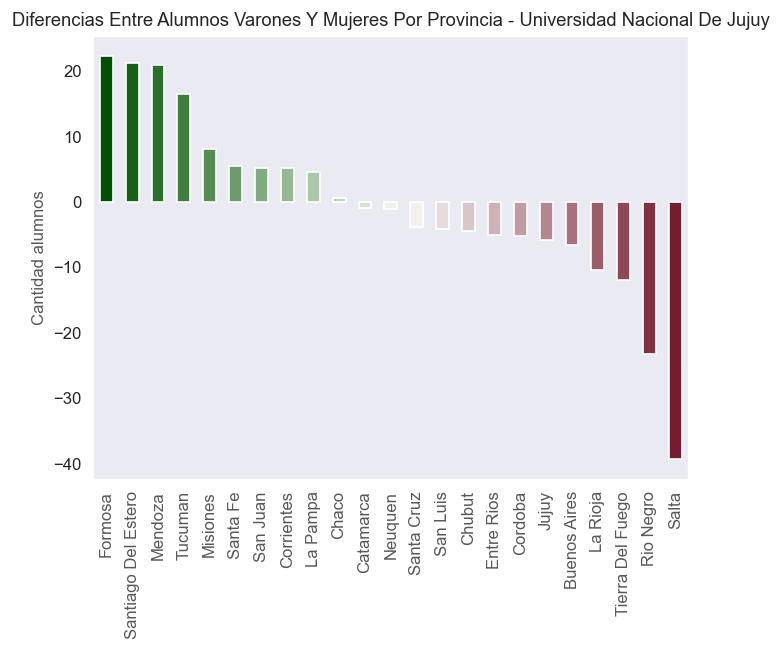

In [636]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres por provincia - {university1_name}'.title(),{'fontsize':11})
ax.set_ylabel('Cantidad alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

### Localidades - UP

In [637]:
df_2.location.value_counts().head(10)

agua colorada      23
9 de julio         19
25 de mayo         19
bella vista        15
alto verde         14
albigasta          13
aguas calientes    12
avellaneda         11
agua blanca        11
cheroguita         10
Name: location, dtype: int64

<AxesSubplot:ylabel='Frequency'>

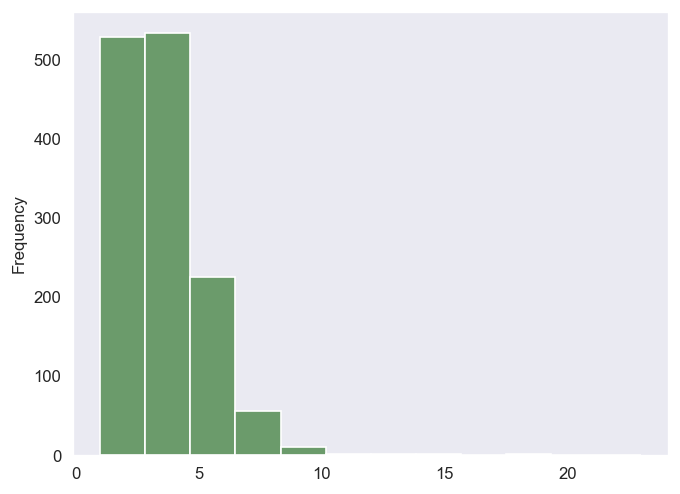

In [638]:
df_2.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

### Segregación por tipo de carrera

In [639]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género

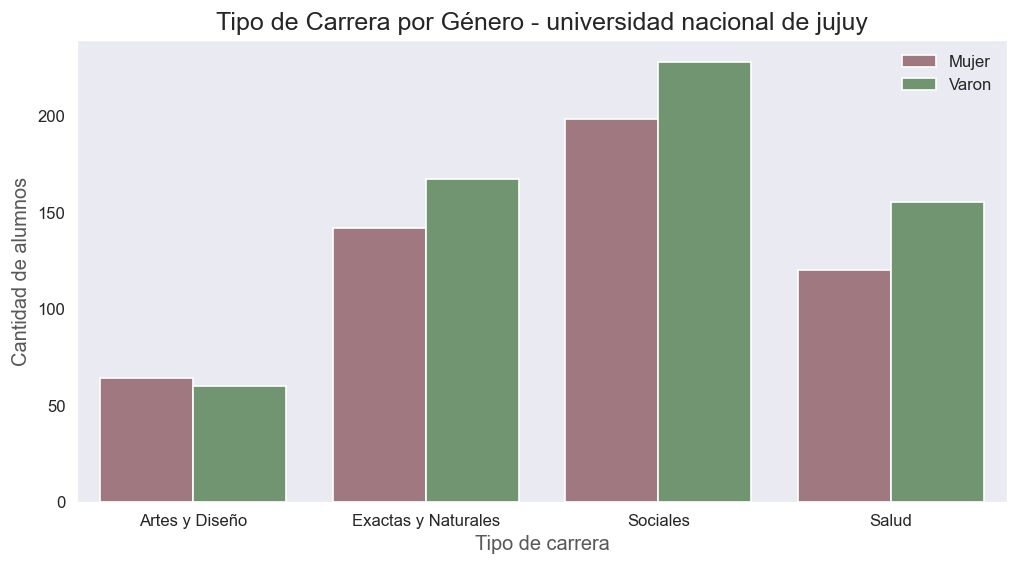

In [640]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


En la UNJ parece haber cierta disparidad de varones frente a mujeres en todos los tipos de carreras aunque mayormente en salud y solo artes y diseño tiene mayor cantidad de alumnas.

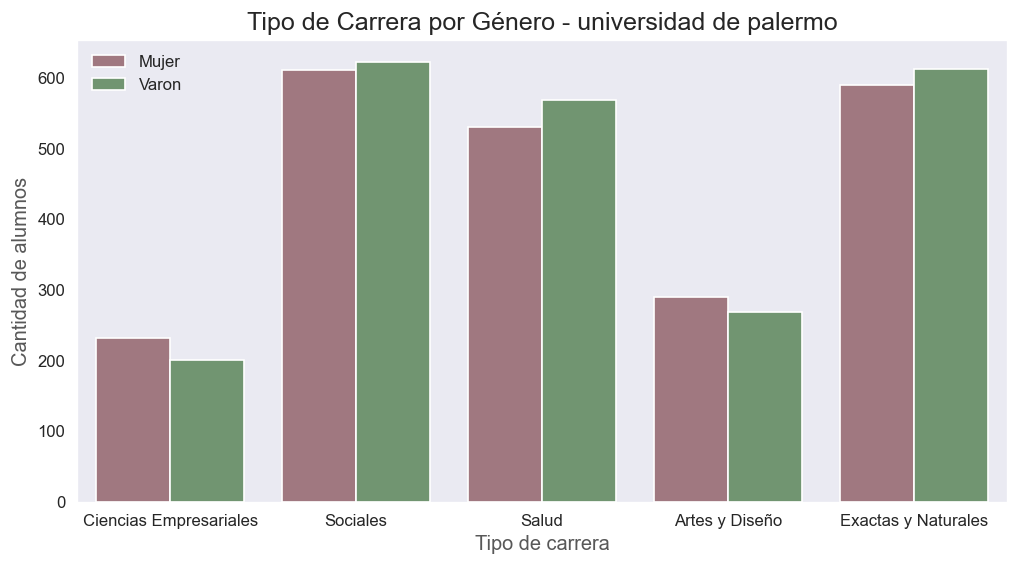

In [645]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

Por último si diferenciamos por tipo de carrera podemos ver que la mayor disparidad de varones se da en Salud y Exactas y Naturales en la UP. Por otro lado en ciencias empresariales se ve mayor proporción de alumnas. Sociales parece tener cierta equidad respecto al género.

### Top Carreras por Proporción de Alumnas - Universidad Nacional de Jujuy

In [729]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.head()

gender,female,male
career,,
licenciatura en artes,0.608696,0.391304
licenciatura en planificación y diseño del paisaje,0.585366,0.414634
licenciatura en relaciones del trabajo,0.536585,0.463415
diseño de imagen y sonido,0.535714,0.464286
licenciatura en ciencias geológicas,0.529412,0.470588


**Las mayoría de las carreras que más proporción tiene de mujeres corresponde a carreras relacionadas al arte y el diseño**

In [730]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.tail()

gender,female,male
career,,
licenciatura en administración,0.400000,0.600000
licenciatura en ciencia política,0.393939,0.606061
ciencias veterinarias,0.350000,0.650000
actuario,0.322581,0.677419
licenciatura en ciencias antropológicas,0.321429,0.678571


No parece haber un patrón en las carreras menos concurridas. Cabe destacar que tanto Ciencias Veterinarias y Antropología suelen tener actidades de campo.

### Top Carreras por Proporción de Alumnas - Universidad de Palermo

In [732]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.head()

gender,female,male
career,,
farmacia,0.588652,0.411348
licenciatura en ciencias geológicas,0.556338,0.443662
medicina,0.555556,0.444444
técnico para bioterios,0.550000,0.450000
licenciatura en ciencias de la educación,0.548611,0.451389


En este caso la diferencia a pesar de no ser mayor al 10% se ve una predisposición a las ciencias de la salud y exáctas y naturales.

In [733]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.tail()

gender,female,male
career,,
licenciatura en planificación y diseño del paisaje,0.460938,0.539062
contador público,0.459854,0.540146
arquitectura,0.446970,0.553030
licenciatura en artes,0.444444,0.555556
actuario,0.429577,0.570423


Las carreras con menos mujeres en esta universidad corresponden a carreras de arte y diseño y ciencias empresariales.

### Algunos ejemplos

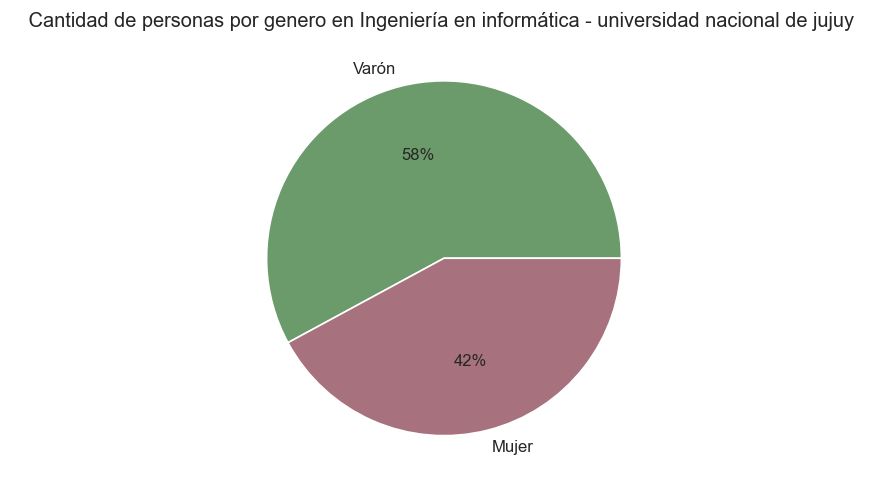

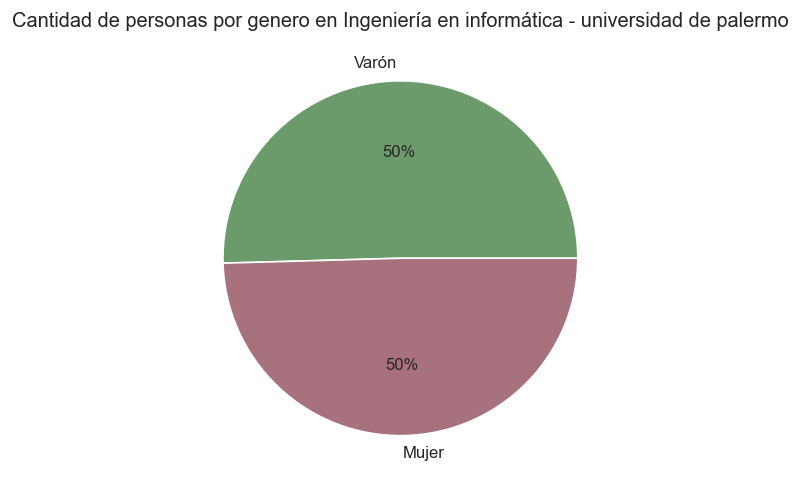

In [734]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


La carrera de informática suele tener el prejuicio de ser una carrera propia de varones, como vemos en este caso, aunque UNJ tiene una diferencia del 8% sobre las alumnas no es significativo. Lo mismo sucede en la UP donde la carrera parece tener una paridad.

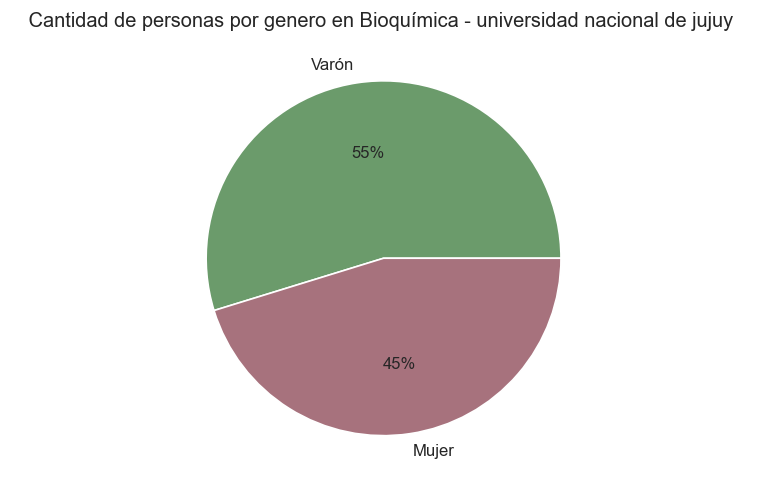

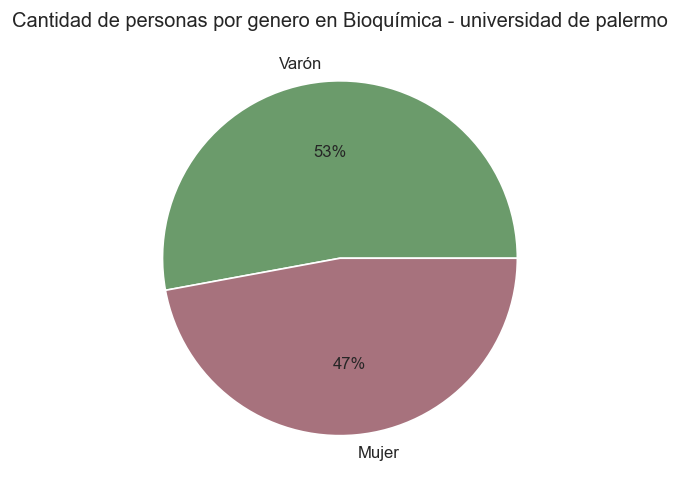

In [643]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

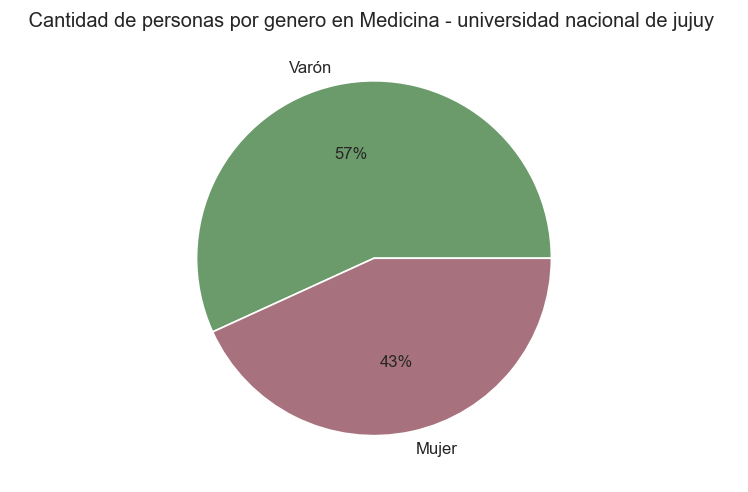

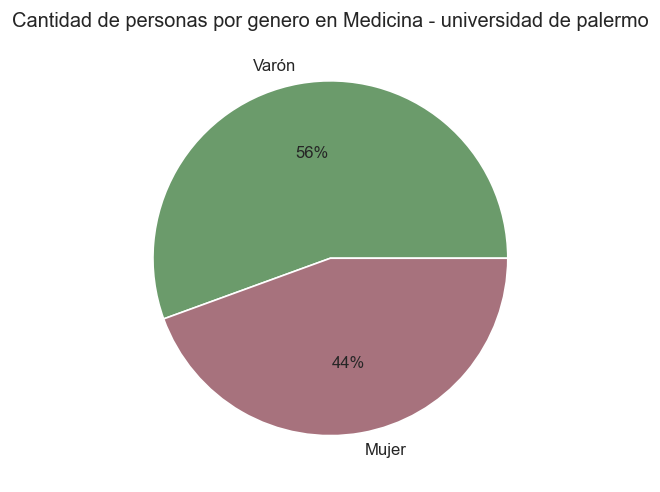

In [644]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

Tanto en Bioquímica como en Medicina, dos carreras que suelen tener el prejuicio de tener más mujeres en ambas carreras para ambas universidades muestran una prevalencia de varones.

# Conclusiones

- UNJ tiene una distribución uniforme, con lo cuál es importante remarcar que la cantidad de alumnos de todas las edades en edad de trabajo es alta y podría ser interesante la estimulación de turnos y comisiones nocturnas para no interferir con sus actividades
- UNJ tiene cierta disparidad en todos sus tipos de carreras excepto en Arte y Diseño, con lo cuál se recomienda incentivar y otorgar becas para generar equidad en aquellas con menor proporción de alumnas, especialmente en las carreras de salud.
- UP tiene una distribución similar a una distribución Poisson, con un pico en los 20 años, con lo cuál el alumnado es esencialmente joven, con lo cuál podría incentivarse un aumento de alumnado de mayor edad creando carreras cortas y otorgando becas a personas mayores de 21 años.
- UP tiene cierta equidad a lo largo de sus carreras, aunque podría destacarse que las carreras de salud están más pobladas de alumnos varones con excepción de Medicina y Farmacia y las ciencias empresariales por mujeres con excepción de Actuario, con lo cuál podría otorgarse incentivos para estimular la paridad en esos sectores.